In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [8]:
# boilerplate url
# i fucking hate that their default way to list the data is backwards like from december to january
url_pattern = 'https://www.boxofficemojo.com/weekly/by-year/{}/?sort=startDate&sortDir=asc&ref_=bo_wly__resort#table'

# List to store URLs for each year from 2000 to 2022
all_urls = []
for year in range(2000, 2023):
    url = url_pattern.format(year)
    all_urls.append(url) 

# List to store all the DataFrames
dfs = []

In [9]:
# Loop through each URL and read the first table using pd.read_html()
# Append the resulting dataframe to the list of dataframes I declared earlier
for url in all_urls:
    df = pd.read_html(url, header=0)[0]
    dfs.append(df)

# put the list of dataframes into on single dataframe
final_data = pd.concat(dfs, ignore_index=True)
# drop columns we wont be using or columns that have too many missing values
# we drop the dates column bc the way they set up dates in the tables is useless
columns_to_drop = ['Genre', 'Budget', 'Running Time', 'Dates']
final_data = final_data.drop(columns_to_drop, axis=1)
final_data

,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend
0,"$91,647,587",-31.9%,"$130,929,381",-19%,56,Stuart Little,1,False
1,"$105,023,114",+14.6%,"$146,456,782",+11.9%,57,Next Friday,2,False
2,"$67,541,452",-35.7%,"$105,493,208",-28%,58,Next Friday,3,False
3,"$53,744,545",-20.4%,"$86,115,844",-18.4%,60,Eye of the Beholder,4,False
4,"$81,219,487",+51.1%,"$110,651,459",+28.5%,55,Scream 3,5,False
...,...,...,...,...,...,...,...,...
1195,"$65,533,485",-39.4%,"$71,808,894",-37.2%,59,Black Panther: Wakanda Forever,48,False
1196,"$45,214,764",-31%,"$51,441,972",-28.4%,58,Black Panther: Wakanda Forever,49,False
1197,"$232,765,223",+414.8%,"$236,324,722",+359.4%,47,Avatar: The Way of Water,50,False
1198,"$242,130,042",+4%,"$246,487,640",+4.3%,50,Avatar: The Way of Water,51,False


In [10]:
# need to create our own dates from the beginning of 2000 to the end of the data
date_range = pd.date_range(start='2000-01-01', periods=len(final_data), freq='W')
# create pandas dataframe with datetime column
df = pd.DataFrame({'dates': date_range})
# add the datetime column to the existing dataframe
final_data['dates'] = df['dates']
final_data

,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Week,Long Weekend,dates
0,"$91,647,587",-31.9%,"$130,929,381",-19%,56,Stuart Little,1,False,2000-01-02
1,"$105,023,114",+14.6%,"$146,456,782",+11.9%,57,Next Friday,2,False,2000-01-09
2,"$67,541,452",-35.7%,"$105,493,208",-28%,58,Next Friday,3,False,2000-01-16
3,"$53,744,545",-20.4%,"$86,115,844",-18.4%,60,Eye of the Beholder,4,False,2000-01-23
4,"$81,219,487",+51.1%,"$110,651,459",+28.5%,55,Scream 3,5,False,2000-01-30
...,...,...,...,...,...,...,...,...,...
1195,"$65,533,485",-39.4%,"$71,808,894",-37.2%,59,Black Panther: Wakanda Forever,48,False,2022-11-27
1196,"$45,214,764",-31%,"$51,441,972",-28.4%,58,Black Panther: Wakanda Forever,49,False,2022-12-04
1197,"$232,765,223",+414.8%,"$236,324,722",+359.4%,47,Avatar: The Way of Water,50,False,2022-12-11
1198,"$242,130,042",+4%,"$246,487,640",+4.3%,50,Avatar: The Way of Water,51,False,2022-12-18


C:\Users\dhruv\AppData\Local\Temp\ipykernel_6876\2858286236.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data['Overall Gross'] = final_data['Overall Gross'].astype(str).str.replace(',', '').str.replace('$', '')


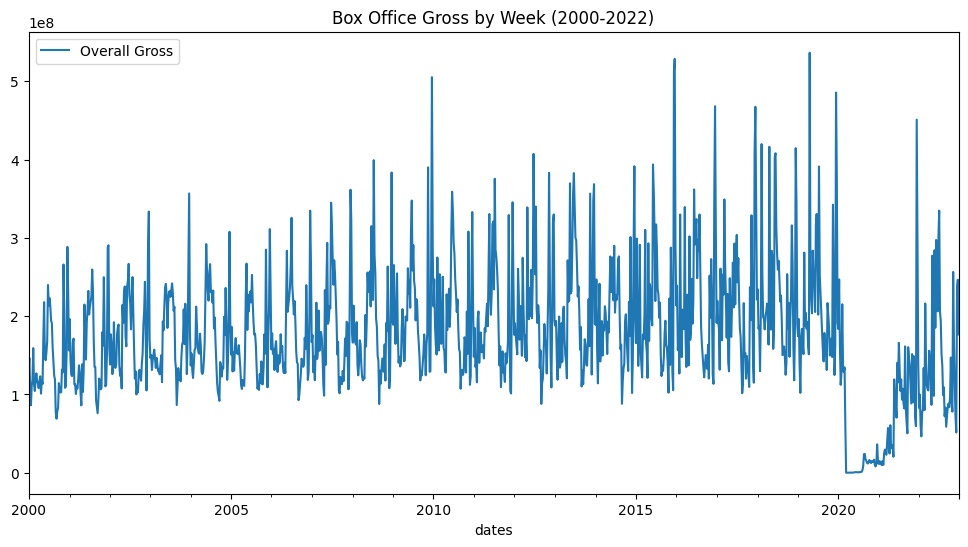

In [14]:
final_data['Overall Gross'] = final_data['Overall Gross'].astype(str).str.replace(',', '').str.replace('$', '')
# final_data['Overall Gross'] = pd.to_numeric(final_data['Overall Gross'].str.replace('[^0-9]', '')) / 1000000

final_data['Overall Gross'] = pd.to_numeric(final_data['Overall Gross'], errors='coerce')
final_data.plot(x='dates', y='Overall Gross', figsize=(12, 6), title='Box Office Gross by Week (2000-2022)')

# Save the final_data DataFrame to a CSV file
final_data.to_csv('box_office_data.csv', index=False)


